# Exploration

This notebook contain the steps need to recreate exploration phase of data science pipeline. 

---
### Required imports
Everything we need to run the code blocks in this notebook are located in the top level directory. To run the code blocks in this report you will need numpy, pandas, matplotlib, seaborn, sklearn, and the wrangle file we just made.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from wrangle import *

import warnings
warnings.filterwarnings("ignore")

Using wrangle function import and clean data

In [3]:
df = wrangle()

Ensure the import worked

In [4]:
df

,cms_certification_number_(ccn),city,state,county_name,cms_region,condition,number_of_instances,footnote
0,013025,BIRMINGHAM,AL,Jefferson,4,All other conditions,346,0.0
1,013025,BIRMINGHAM,AL,Jefferson,4,Brain disease or condition (non-traumatic),150,0.0
2,013025,BIRMINGHAM,AL,Jefferson,4,Brain injury (traumatic),38,0.0
3,013025,BIRMINGHAM,AL,Jefferson,4,Hip or femur fracture,156,0.0
4,013025,BIRMINGHAM,AL,Jefferson,4,"Hip or knee replacement, amputation or other b...",329,0.0
...,...,...,...,...,...,...,...,...
10588,713027,LAFAYETTE,LA,Lafayette,6,"Hip or knee replacement, amputation or other b...",0,2.0
10589,713027,LAFAYETTE,LA,Lafayette,6,Nervous system disorder (excluding stroke),0,2.0
10590,713027,LAFAYETTE,LA,Lafayette,6,Spinal cord disease or condition (non-traumatic),0,2.0
10591,713027,LAFAYETTE,LA,Lafayette,6,Spinal cord injury (traumatic),0,2.0


Start visualizing number of instances

<AxesSubplot:xlabel='cms_region', ylabel='number_of_instances'>

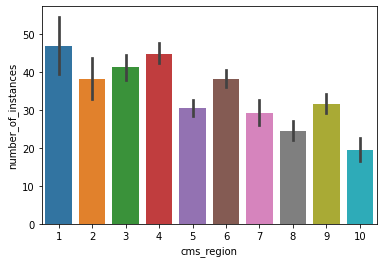

In [11]:
sns.barplot(data= df, y='number_of_instances', x='cms_region')

Instances vs State

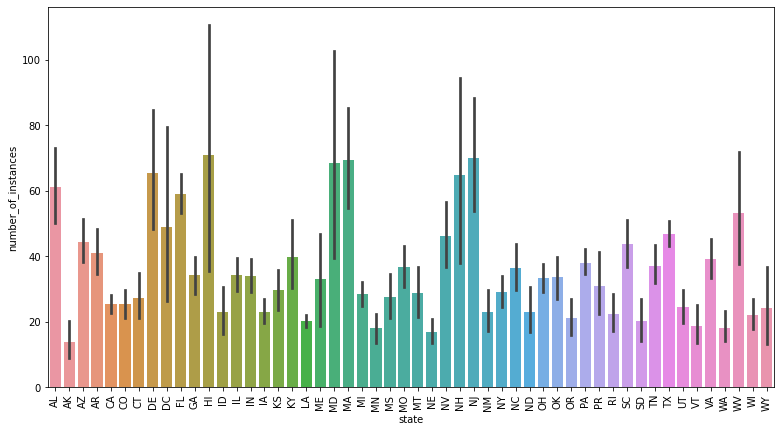

In [182]:
sns.barplot(data= df, y='number_of_instances', x='state')
plt.xticks(rotation=90)
plt.show()

Number of instances per region and condition

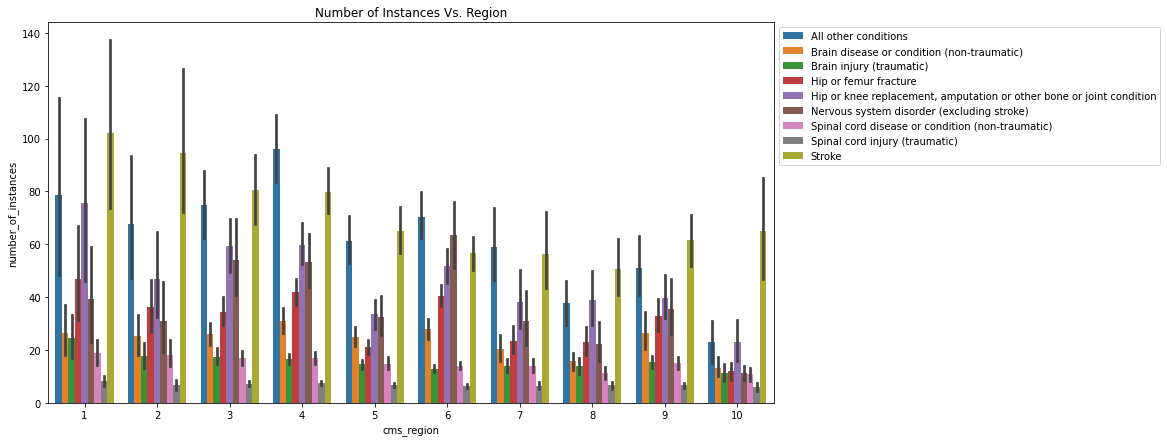

<Figure size 720x1008 with 0 Axes>

In [67]:
ax = sns.barplot(data= df, y='number_of_instances', x='cms_region', hue='condition')
plt.title('Number of Instances Vs. Region')
plt.figure(figsize=(10,14))
ax.legend(bbox_to_anchor=(1,1), loc='upper left')

Stroke and other conditions seem to have the highest condition

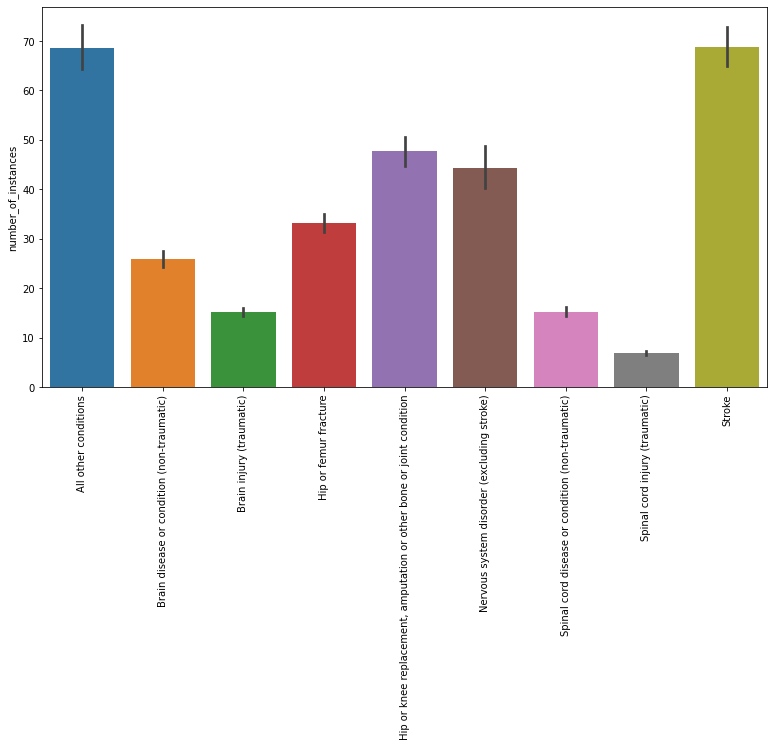

In [184]:
sns.barplot(data= df, y='number_of_instances', x='condition')
plt.xticks(rotation=90)
plt.xlabel('')
plt.show()

Stroke is the most ocurring condition, followed by all other conditions.
<p>Group dataframe by condition adding all instances.

In [40]:
df.groupby('condition').sum().sort_values(by=['number_of_instances'], ascending=False)

,cms_region,number_of_instances,footnote
condition,,,
Stroke,6325,80959,234.0
All other conditions,6325,80627,289.0
"Hip or knee replacement, amputation or other bone or joint condition",6325,56156,349.0
Nervous system disorder (excluding stroke),6325,52184,581.0
Hip or femur fracture,6325,39173,457.0
Brain disease or condition (non-traumatic),6325,30533,611.0
Brain injury (traumatic),6325,17989,844.0
Spinal cord disease or condition (non-traumatic),6325,17955,818.0
Spinal cord injury (traumatic),6325,8129,1528.0


Now let's get assign it to a variable to a dataframe with all data with stroke condition

In [83]:
stroke = df[(df.condition == 'Stroke')==True]

Verify it worked

In [91]:
stroke

,cms_certification_number_(ccn),city,state,county_name,cms_region,condition,number_of_instances,footnote
8,013025,BIRMINGHAM,AL,Jefferson,4,Stroke,205,0.0
17,013028,MONTGOMERY,AL,Montgomery,4,Stroke,220,0.0
26,013029,HUNTSVILLE,AL,Madison,4,Stroke,205,0.0
35,013030,DOTHAN,AL,Houston,4,Stroke,160,0.0
44,013031,PELHAM,AL,Shelby,4,Stroke,69,0.0
...,...,...,...,...,...,...,...,...
10556,673078,SAN ANGELO,TX,Tom Green,6,Stroke,0,2.0
10565,67T055,SAN ANTONIO,TX,Bexar,6,Stroke,52,0.0
10574,713025,LACOMBE,LA,St. Tammany,6,Stroke,89,0.0
10583,713026,BOGALUSA,LA,Washington,6,Stroke,48,0.0


State with the highest number of strokes is Texas with 9230 and the least is Alaska with 88.

Sort it by state and sort by number of instances.

In [141]:
stroke_state = stroke.groupby('state').sum().sort_values(by=['number_of_instances'], ascending=False)
stroke_state

,cms_region,number_of_instances,footnote
state,,,
TX,834,9230,24.0
FL,224,5438,5.0
PA,210,5191,12.0
CA,765,4516,24.0
OH,260,3614,10.0
NY,90,3229,13.0
IL,210,3059,8.0
NJ,30,2587,0.0
MI,215,2491,9.0


Remove region and footnote columns.

In [145]:
stroke_state.drop(columns=['cms_region', 'footnote'], inplace=True)
stroke_state

,number_of_instances
state,
TX,9230
FL,5438
PA,5191
CA,4516
OH,3614
NY,3229
IL,3059
NJ,2587
MI,2491


State is the index so it only shows one column

In [146]:
stroke_state.columns

Index(['number_of_instances'], dtype='object')

Reset the index

In [155]:
stroke_state = stroke_state.reset_index()

Now it shows two columns

In [156]:
stroke_state.columns

Index(['state', 'number_of_instances'], dtype='object')

Visualize the dataframe

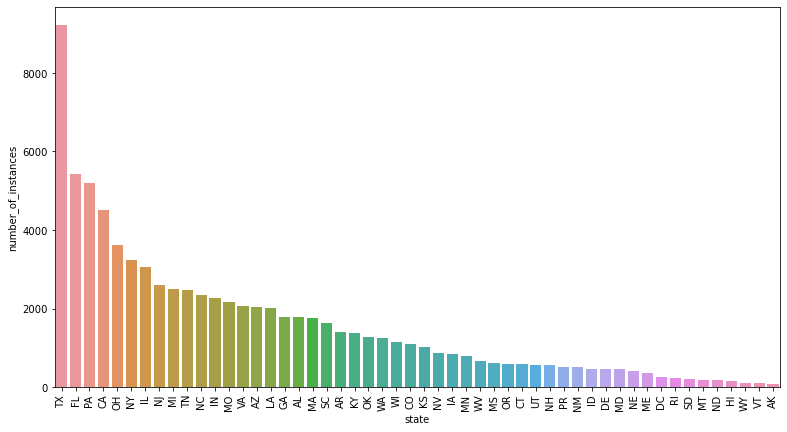

In [159]:
sns.barplot(data=stroke_state,x='state', y='number_of_instances')
plt.xticks(rotation=90)
plt.show()

Texas is the highest and Alaska the lowest

Our Next question is what city is the one with the largest. Let's get the stroke dataframe and select by state.

In [162]:
tx_stroke = stroke[(stroke.state == 'TX')==True]
tx_stroke

,cms_certification_number_(ccn),city,state,county_name,cms_region,condition,number_of_instances,footnote
8522,453025,HOUSTON,TX,Harris,6,Stroke,176,0.0
8531,453029,HUMBLE,TX,Harris,6,Stroke,129,0.0
8540,453031,SAN ANTONIO,TX,Bexar,6,Stroke,134,0.0
8549,453035,SAN ANTONIO,TX,Bexar,6,Stroke,214,0.0
8558,453036,DALLAS,TX,Dallas,6,Stroke,115,0.0
...,...,...,...,...,...,...,...,...
10529,673075,EL PASO,TX,El Paso,6,Stroke,17,0.0
10538,673076,FLOWER MOUND,TX,Denton,6,Stroke,10,1.0
10547,673077,KELLER,TX,Tarrant,6,Stroke,10,1.0
10556,673078,SAN ANGELO,TX,Tom Green,6,Stroke,0,2.0


Now let's group by city. Drop other two columns.

In [164]:
tx_city = tx_stroke.groupby('city').sum().sort_values(by=['number_of_instances'])
tx_city.drop(columns=['cms_region', 'footnote'], inplace=True)
tx_city

,number_of_instances
city,
SAN ANGELO,0
KELLER,10
FLOWER MOUND,10
EAGLE PASS,10
HUNTSVILLE,11
...,...
WEBSTER,389
FORT WORTH,467
DALLAS,557


San Angelo is the lowest city with 0 and Houston is the highest with 811.

Reset index to visualize

In [166]:
tx_city = tx_city.reset_index()

In [168]:
tx_city.columns

Index(['city', 'number_of_instances'], dtype='object')

We can visualize the 75 cities in Texas

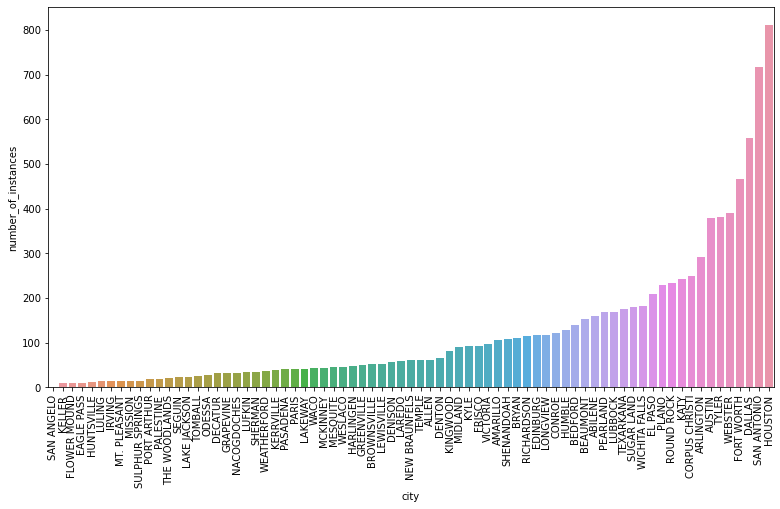

In [169]:
sns.barplot(data=tx_city, x='city', y='number_of_instances')
plt.xticks(rotation=90)
plt.show()

Now let's do the state with the least amount of instances.

In [170]:
ak_stroke = stroke[(stroke.state == 'AK')==True]
ak_stroke

,cms_certification_number_(ccn),city,state,county_name,cms_region,condition,number_of_instances,footnote
179,02T017,ANCHORAGE,AK,Anchorage,10,Stroke,55,0.0
188,02TA01,ANCHORAGE,AK,Anchorage,10,Stroke,33,0.0


There is only two listings and only one city so we will not visualize.

Now let's group by region and drop footnote column

In [172]:
stroke_region = stroke.groupby('cms_region').sum().sort_values(by=['number_of_instances'], ascending=False)
stroke_region.drop(columns=['footnote'], inplace=True)
stroke_region

,number_of_instances
cms_region,
4,17414
6,14418
5,13376
3,9111
9,7576
2,6338
7,4409
1,3577
10,2407


Region 4 is the highest with 17414 and region 8 with 2333.
<p>
Region 4 includes Alabama, Florida, Georgia, Kentucky, Mississippi, North Carolina, South Carolina, Tennessee.
<p>
Region 8 includes Colorado, Montana, North Dakota, South Dakota, Utah, Wyoming

Reset index and visualize.

In [175]:
stroke_region = stroke_region.reset_index()

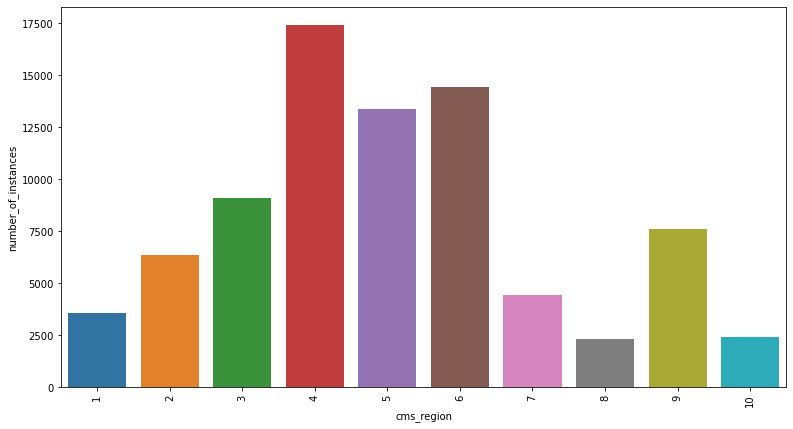

In [176]:
sns.barplot(data=stroke_region,x='cms_region', y='number_of_instances')
plt.xticks(rotation=90)
plt.show()